# Visualize All TVB Simulations Generated on Mass

Since the cluster can easily generate different datasets using TVB, I need to visualize all the results quickly to ensure that the data was generated correctly. In order to do this, the user just needs to pass in a data directory that contains all the tvb simulations for that specific experiment.

Then it will print on the title the file id and extract the epits and the corresponding onset/offset times to make sure they are correct.

Then I will input a data modifier that allows us to resave the fileid with the modified onset/offset times if necessary.

In [3]:
import numpy as np
import pandas as pd
import os

from tvb.simulator.lab import *
import sys
import scipy.io
import tvbsim

np.random.seed(123456789)

# plotting fxns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

   INFO  log level set to INFO


In [4]:
# set all directories
root_dir = os.path.join('/Users/adam2392/Documents/pydata/')
root_dir = os.path.join('/Volumes/ADAM LI/pydata/tvbforwardsim/')

patient='id008_gc'
# patient ='id013_pg'
# patient = 'id001_ac'
expname = 'varydist_1'

datadir = os.path.join(root_dir, expname)
# Get ALL datafiles from all downstream files
datafiles = []
for root, dirs, files in os.walk(datadir):
    for file in files:
        if '.DS' not in file:
            datafiles.append(os.path.join(root, file))
print(len(datafiles))

124


# Perform Visualization In a Loop

Loop through all datafiles and visualize the epileptor source signals with the onset/offset times

[u'x0norm', u'pz', u'ez', u'seeg_xyz', u'onsettimes', u'regions_centers', u'regions', u'offsettimes', u'patient', u'x0pz', u'epiparams', u'pzindices', u'x0ez', u'samplerate', u'ezindices', u'chanlabels']
{'ntau': 2, 'tau': array([10]), 'nsig': array([[[0.001 ]],

       [[0.001 ]],

       [[0.    ]],

       [[0.0001]],

       [[0.0001]],

       [[0.    ]]]), 'tt': array([0.02]), 'ks': array([-0.5]), 'r': array([0.00037]), 'x0': array([-2.35, -2.35, -2.35, -2.35, -1.9 , -1.9 , -2.35, -2.35, -2.35,
       -2.35, -2.35, -2.35, -2.35, -2.35, -2.35, -2.35, -2.35, -2.35,
       -2.35, -2.35, -2.35, -2.35, -2.35, -2.35, -2.35, -2.35, -2.35,
       -2.35, -2.35, -2.35, -2.35, -1.9 , -2.35, -2.35, -2.35, -2.35,
       -2.35, -2.35, -2.35, -1.9 , -1.9 , -2.35, -2.35, -2.35, -2.35,
       -2.35, -2.35, -2.35, -2.35, -2.35, -2.35, -2.35, -2.35, -1.9 ,
       -2.35, -2.35, -2.35, -2.35, -2.35, -2.35, -2.35, -2.35, -2.35,
       -2.35, -2.35, -2.35, -2.35, -2.35, -2.35, -2.35, -2.35, -2.35,
    

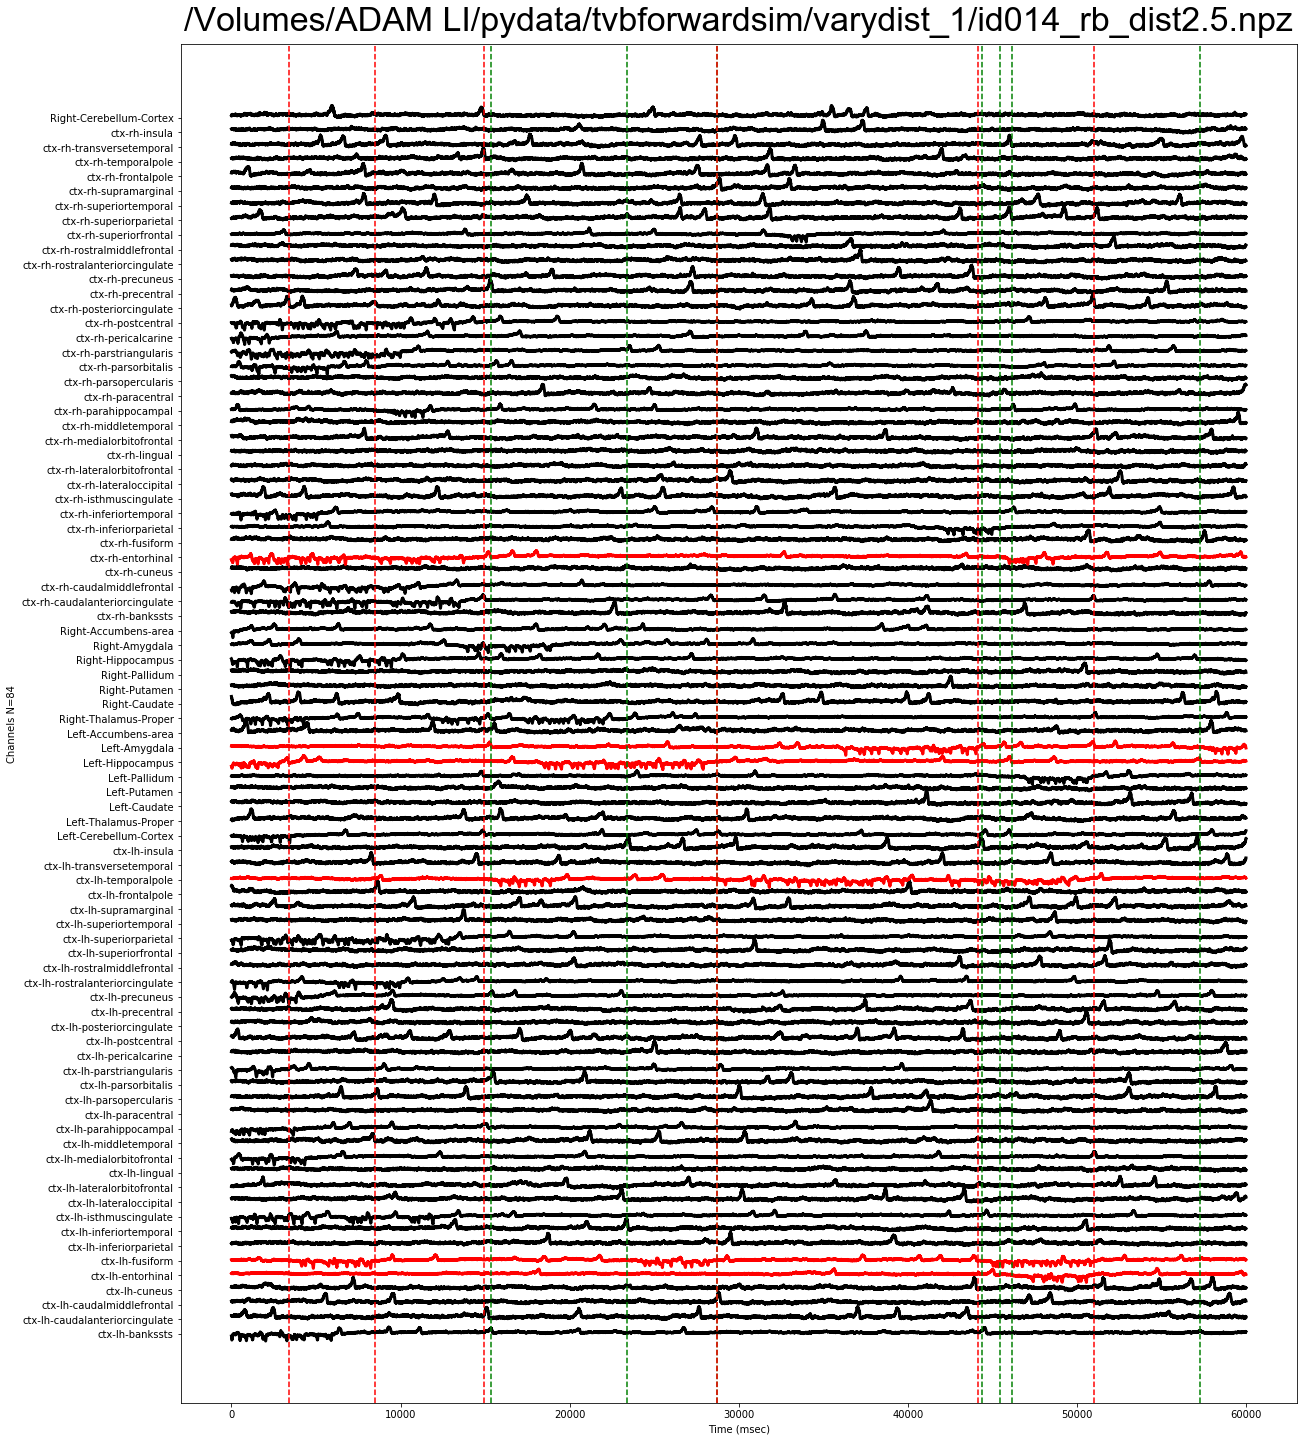

In [5]:
decodebytes = lambda var: np.array([k.decode("utf-8").lower() if isinstance(k, bytes) else k for k in var])
tsviz = tvbsim.visualize.plotts.VisualTs()

for datafile in datafiles:
    # load in the data for each simulation and run a large loop to visualize all the data
    npfile = open(datafile, 'r')
    data = np.load(npfile)
    epits = data['epits']
#     seegts = data['seegts']
#     times = data['times']
#     zts = data['zts']
    metadata = data['metadata'].item()
    metadata = {k.decode("utf-8"): (v.decode("utf-8") if isinstance(v, bytes) else v) for k,v in metadata.items()}
    
    print(metadata.keys())
    print(metadata['epiparams'])
    ezind = metadata['ezindices']
    pzind = metadata['pzindices']
    seizonsets = metadata['onsettimes']
    seizoffsets = metadata['offsettimes']
    region_labels = metadata['regions']
    
    # PLOTTING THE TIME SERIES OF THE SOURCE SIGNALS
    tsviz.loaddata(data=epits,ylabels=region_labels)
    # visualize seegts
    tsviz.setfigsize(figsize=(20,25))
    fig, ax = tsviz.plotts(normalize=True, titlestr=datafile)
    tsviz.plotvertlines(onsettimes=seizonsets, offsettimes=seizoffsets)
    tsviz.colorts(ezind, color='red')
    tsviz.colorts(pzind, color='blue')

    break

# Perform Data Updating If Necessary

If there are anyfiles, just copy paste tehir fileid over and then reload the data and modify the onset/offset times as necessary.

In [ ]:
# filename = ''

# load in the data for each simulation and run a large loop to visualize all the data
npfile = open(datafile, 'r')
data = np.load(npfile)
epits = data['epits']
seegts = data['seegts']
times = data['times']
zts = data['zts']
metadata = data['metadata'].item()
metadata = {k.decode("utf-8"): (v.decode("utf-8") if isinstance(v, bytes) else v) for k,v in metadata.items()}
    
ezind = metadata['ezindices']
pzind = metadata['pzindices']
seizonsets = metadata['onsettimes']
seizoffsets = metadata['offsettimes']
region_labels = metadata['regions']
    
# GET ONSET/OFFSET OF SEIZURE
postprocessor = tvbsim.postprocess.PostProcessor(samplerate=_samplerate, allszindices=allindices)
settimes = postprocessor.getonsetsoffsets(zts, allindices, lookahead=100, delta=0.2)# get the actual seizure times and offsets
seizonsets, seizoffsets = postprocessor.getseiztimes(settimes)

In [6]:
npfile = open(filename, 'wb')
# save tseries
np.savez_compressed(npfile, 
                    epits=epits, 
                    seegts=seegts, \
                    times=times, 
                    zts=zts, 
                    metadata=metadata)

NameError: name 'filename' is not defined